## **Importing Libraries and SONY Stock Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import yfinance as yahooFinance

In [ ]:
pip install mplfinance

Importing Data using Yahoo Finance

In [ ]:
pip install yfinance

In [ ]:
GetSONY = yahooFinance.Ticker("SONY")

## **Observing Data**

In [ ]:
for key, value in GetSONY.info.items():
  print(key, ":", value)

address1 : 7-1, Konan 1-chome
address2 : Minato-ku
city : Tokyo
zip : 108-0075
country : Japan
phone : 81 3 6748 2111
website : https://www.sony.com
industry : Consumer Electronics
industryKey : consumer-electronics
industryDisp : Consumer Electronics
sector : Technology
sectorKey : technology
sectorDisp : Technology
longBusinessSummary : Sony Group Corporation designs, develops, produces, and sells electronic equipment, instruments, and devices for the consumer, professional, and industrial markets in Japan, the United States, Europe, China, the Asia-Pacific, and internationally. The company distributes software titles and add-on content through digital networks; network services related to game, video, and music content; and home gaming consoles, packaged and game software, and peripheral devices. It also develops, produces, markets, and distributes recorded music; publishes music; and produces and distributes animation titles, game applications, and various services for music and vi

We'll be working on data from the past 10 years

In [ ]:
df = GetSONY.history(period="10y")

In [ ]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-03-31 00:00:00-04:00,19.120001,19.250000,19.080000,19.120001,2988700,0.0,0.0
2014-04-01 00:00:00-04:00,19.420000,19.459999,19.290001,19.440001,2230000,0.0,0.0
2014-04-02 00:00:00-04:00,19.190001,19.350000,19.080000,19.290001,1442500,0.0,0.0
2014-04-03 00:00:00-04:00,19.250000,19.280001,18.950001,19.090000,1856300,0.0,0.0
2014-04-04 00:00:00-04:00,19.260000,19.340000,18.950001,19.030001,1378600,0.0,0.0


In [ ]:
df.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-22 00:00:00-04:00,88.739998,88.849998,88.360001,88.620003,298800,0.0,0.0
2024-03-25 00:00:00-04:00,86.260002,86.470001,85.730003,85.959999,723500,0.0,0.0
2024-03-26 00:00:00-04:00,86.599998,87.120003,86.449997,86.720001,568800,0.0,0.0
2024-03-27 00:00:00-04:00,86.900002,86.900002,86.160004,86.540001,655200,0.0,0.0
2024-03-28 00:00:00-04:00,86.190002,86.349998,85.730003,85.739998,661000,0.0,0.0


## **Data Cleaning**

In [ ]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
df.duplicated()

Date
2014-03-31 00:00:00-04:00    False
2014-04-01 00:00:00-04:00    False
2014-04-02 00:00:00-04:00    False
2014-04-03 00:00:00-04:00    False
2014-04-04 00:00:00-04:00    False
                             ...  
2024-03-22 00:00:00-04:00    False
2024-03-25 00:00:00-04:00    False
2024-03-26 00:00:00-04:00    False
2024-03-27 00:00:00-04:00    False
2024-03-28 00:00:00-04:00    False
Length: 2517, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-03-31 00:00:00-04:00 to 2024-03-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2517 non-null   float64
 1   High          2517 non-null   float64
 2   Low           2517 non-null   float64
 3   Close         2517 non-null   float64
 4   Volume        2517 non-null   int64  
 5   Dividends     2517 non-null   float64
 6   Stock Splits  2517 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.3 KB


note: there does not exist any null values hence data clean

## **Graphs**

- this graph represents the overall stock data of Sony from the past Decade

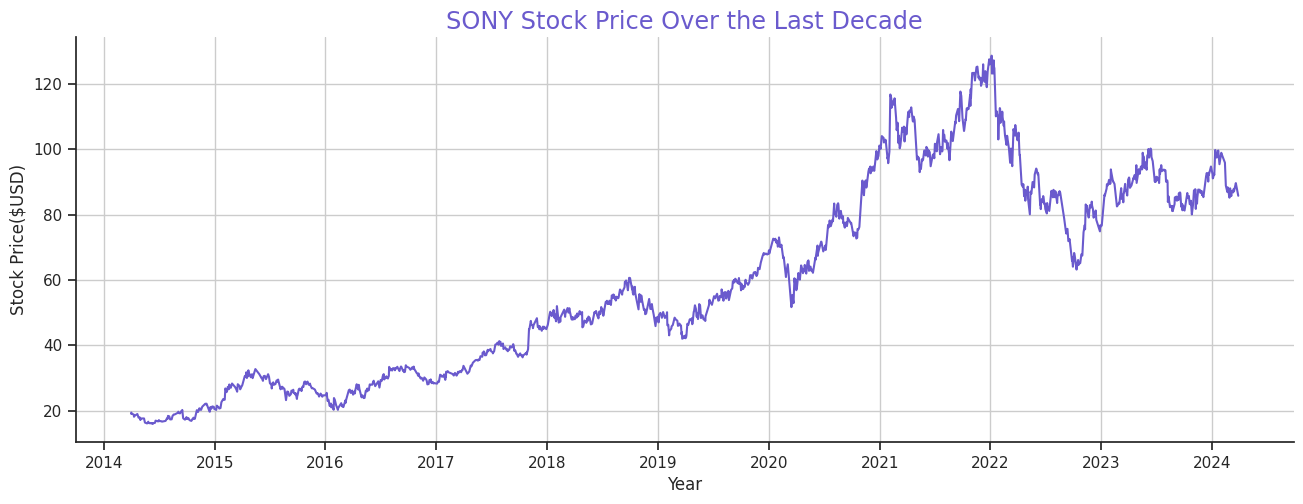

In [ ]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df, x = 'Date', y= 'Close', color = 'slateblue')
sns.despine()
plt.title("SONY Stock Price Over the Last Decade", size = 'x-large', color = 'slateblue')
plt.xlabel("Year")
plt.ylabel("Stock Price($USD)")
plt.grid(True)

- this graph represents the stock prices of SONY, specifically observing the dates during and after the Covid-19 pandemic

[*********************100%%**********************]  1 of 1 completed


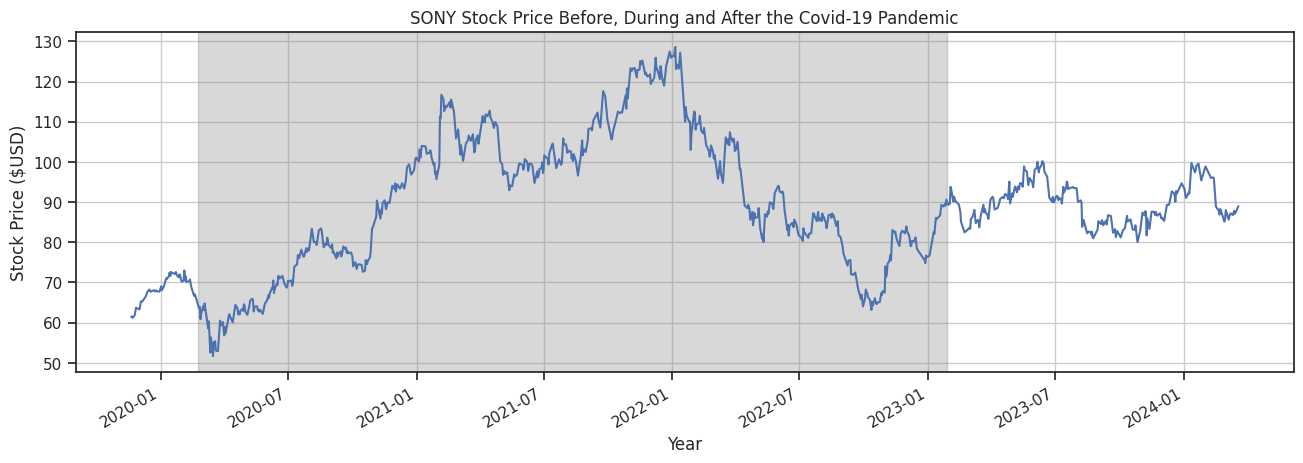

In [ ]:
def plot_sprice(ticker, start_date, end_date, shaded_start, shaded_end, color):

    stock_data = yahooFinance.download(ticker, start=start_date, end=end_date)

    close_prices = stock_data['Close']

    plt.figure(figsize=(14, 5))
    close_prices.plot()

    # Plot shaded region for the specified date range (shade stands for COVID19 pandemic period)
    plt.axvspan(shaded_start, shaded_end, color='gray', alpha=0.3)

    plt.title(f"{ticker} Stock Price Before, During and After the Covid-19 Pandemic")
    plt.xlabel("Year")
    plt.ylabel("Stock Price ($USD)")
    plt.grid(True)
    plt.show()

color = 'slateblue'
ticker_symbol = 'SONY'
start_date = '2019-11-20'
end_date = '2024-03-20'
shaded_start = '2020-02-23'
shaded_end = '2023-01-28'

plot_sprice(ticker_symbol, start_date, end_date, shaded_start, shaded_end, color)

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


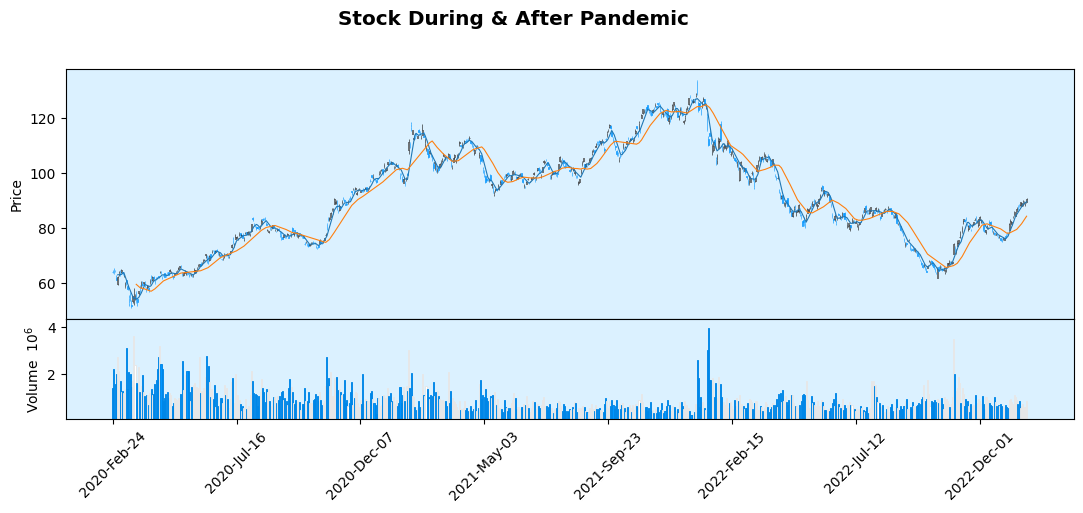

In [ ]:
import mplfinance as mpf
from mplfinance import _styles
_styles.available_styles()
stock_symbol= "SONY"
start_date = "2020-02-23"
end_date = "2023-01-28"
stock_data = yahooFinance.download(stock_symbol, start= start_date, end= end_date)
mpf.plot(stock_data, type='candle', mav=(5,20), volume=True, figsize=(14,5), style='blueskies', title="Stock During & After Pandemic")

Observing the Highest Stock Price Over the Last Decade and during the pandemic (12/28/2021)

[*********************100%%**********************]  1 of 1 completed


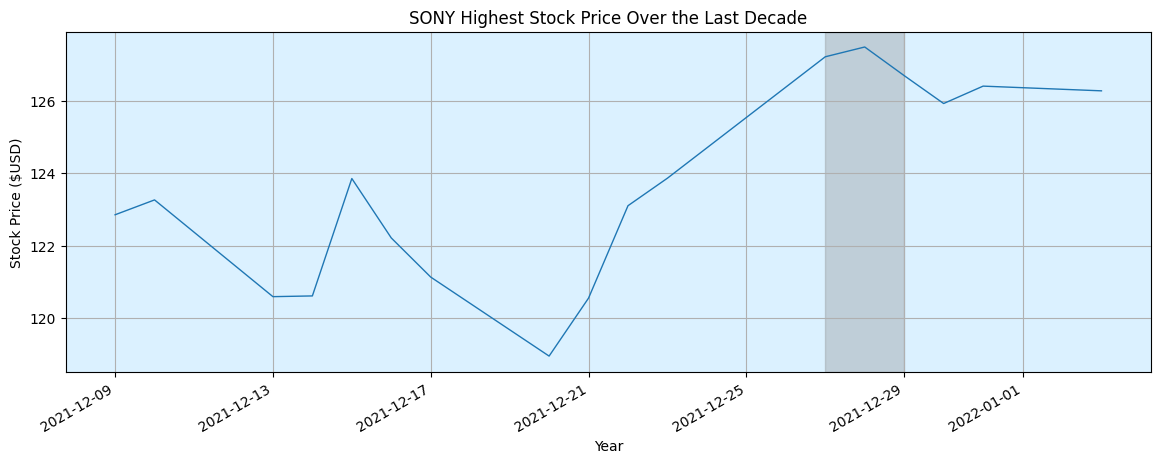

In [ ]:
def plot_sprice(ticker, start_date, end_date, shaded_start, shaded_end, color):

    stock_data = yahooFinance.download(ticker, start=start_date, end=end_date)

    close_prices = stock_data['Close']

    plt.figure(figsize=(14, 5))
    close_prices.plot()

    # Plot shaded region for the specified date range (shade stands for COVID19 pandemic period)
    plt.axvspan(shaded_start, shaded_end, color='gray', alpha=0.3)

    plt.title(f"{ticker} Highest Stock Price Over the Last Decade")
    plt.xlabel("Year")
    plt.ylabel("Stock Price ($USD)")
    plt.grid(True)
    plt.show()

color = 'slateblue'
ticker_symbol = 'SONY'
start_date = '2021-12-9'
end_date = '2022-1-4'
shaded_start = '2021-12-27'
shaded_end = '2021-12-29'

plot_sprice(ticker_symbol, start_date, end_date, shaded_start, shaded_end, color)

SONY Stock Price the day after the PS5 was announced in April 16th, 2019

[*********************100%%**********************]  1 of 1 completed


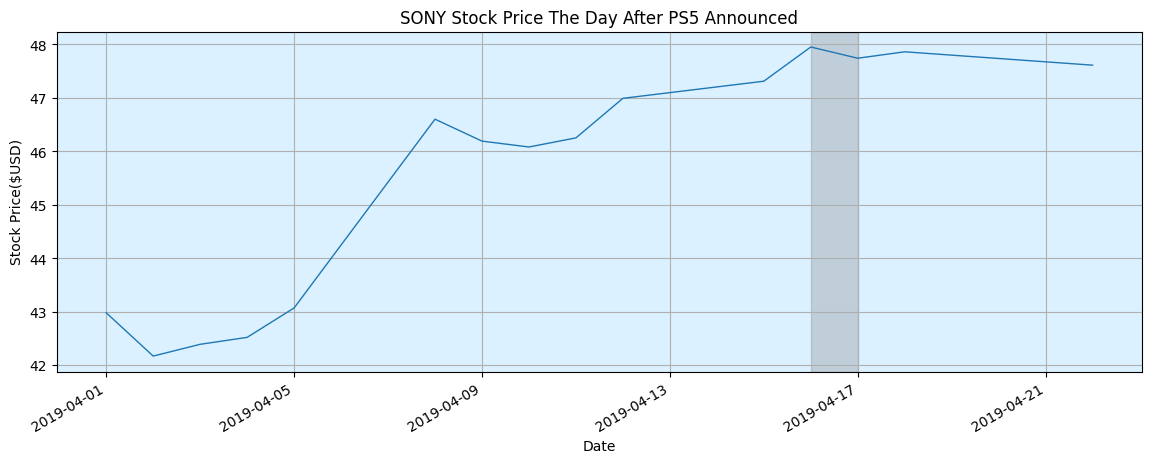

In [ ]:
import yfinance as yahooFinance
import matplotlib.pyplot as plt

def plot_sprice(ticker, start_date, end_date, shaded_start, shaded_end):

    stock_data = yahooFinance.download(ticker, start=start_date, end=end_date)

    close_prices = stock_data['Close']

    plt.figure(figsize=(14,5))
    close_prices.plot()

    # Plot shaded region for the specified date range (shade stands for Acquisition of MGM 24 hr period after announcement)
    plt.axvspan(shaded_start, shaded_end, color='gray', alpha=0.3)

    plt.title(f"{ticker} Stock Price The Day After PS5 Announced")
    plt.xlabel("Date")
    plt.ylabel("Stock Price($USD)")
    plt.grid(True)
    plt.show()


ticker_symbol = 'SONY'
start_date = '2019-4-1'
end_date = '2019-4-23'
shaded_start = '2019-4-16'
shaded_end = '2019-4-17'

plot_sprice(ticker_symbol, start_date, end_date, shaded_start, shaded_end)

Sony's stock price the day after it was unveiled on March 18th, 2020

[*********************100%%**********************]  1 of 1 completed


<BarContainer object of 7 artists>

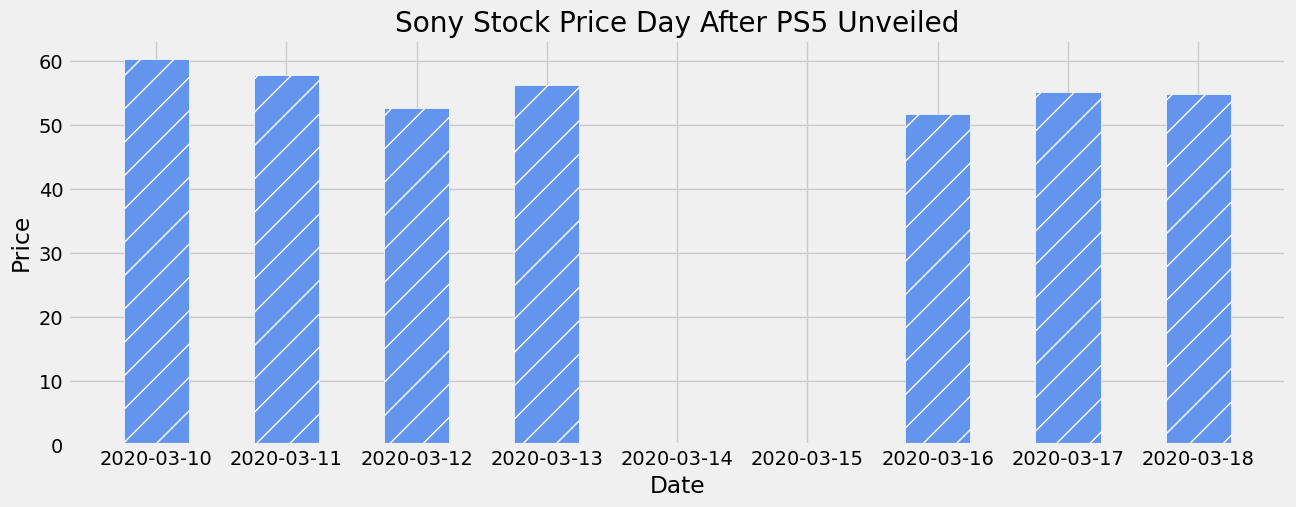

In [ ]:
import datetime
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

plt.figure(figsize=(14,5))

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Sony Stock Price Day After PS5 Unveiled")

startDate = datetime.datetime(2020,3,10)
endDate = datetime.datetime(2020,3,19)
sony_df = yahooFinance.download('SONY', start = startDate, end = endDate)

plt.bar(sony_df.index, sony_df['Close'], width=0.5, hatch='/', edgecolor='white', color='cornflowerblue')

[*********************100%%**********************]  1 of 1 completed


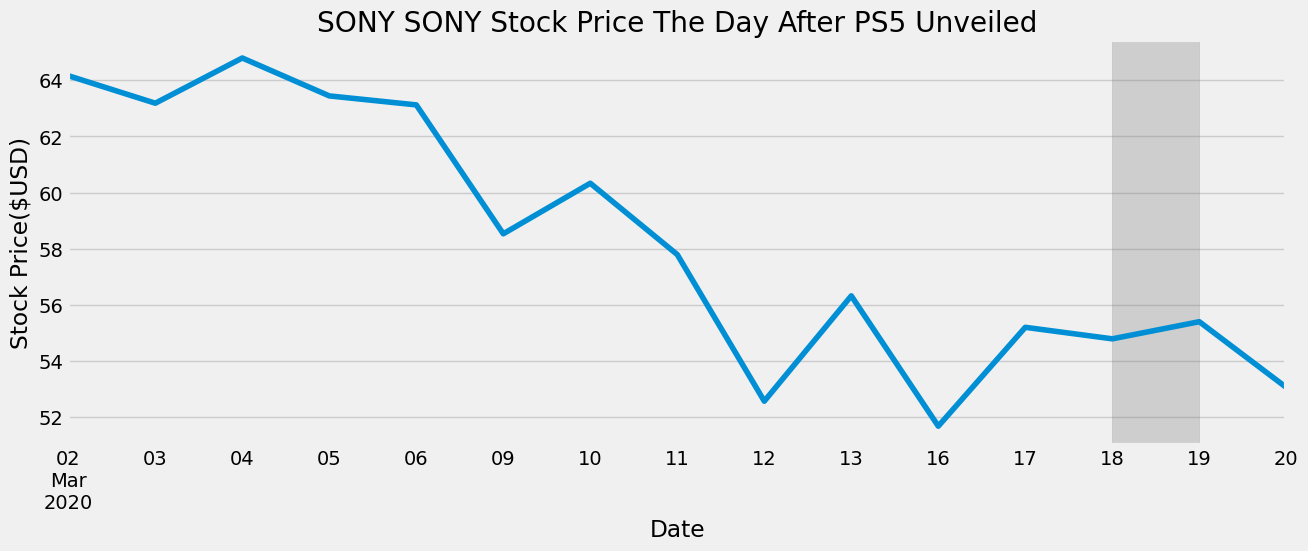

In [ ]:
def plot_sprice(ticker, start_date, end_date, shaded_start, shaded_end):

    stock_data = yahooFinance.download(ticker, start=start_date, end=end_date)

    close_prices = stock_data['Close']

    plt.figure(figsize=(14,5))
    close_prices.plot()

    # Plot shaded region for the specified date range (shade stands for Acquisition of MGM 24 hr period after announcement)
    plt.axvspan(shaded_start, shaded_end, color='gray', alpha=0.3)

    plt.title(f"{ticker} SONY Stock Price The Day After PS5 Unveiled")
    plt.xlabel("Date")
    plt.ylabel("Stock Price($USD)")
    plt.grid(True)
    plt.show()


ticker_symbol = 'SONY'
start_date = '2020-3-1'
end_date = '2020-3-23'
shaded_start = '2020-3-18'
shaded_end = '2020-3-19'

plot_sprice(ticker_symbol, start_date, end_date, shaded_start, shaded_end)

SONY Stock Price After PS5 Release on November 12, 2020

[*********************100%%**********************]  1 of 1 completed


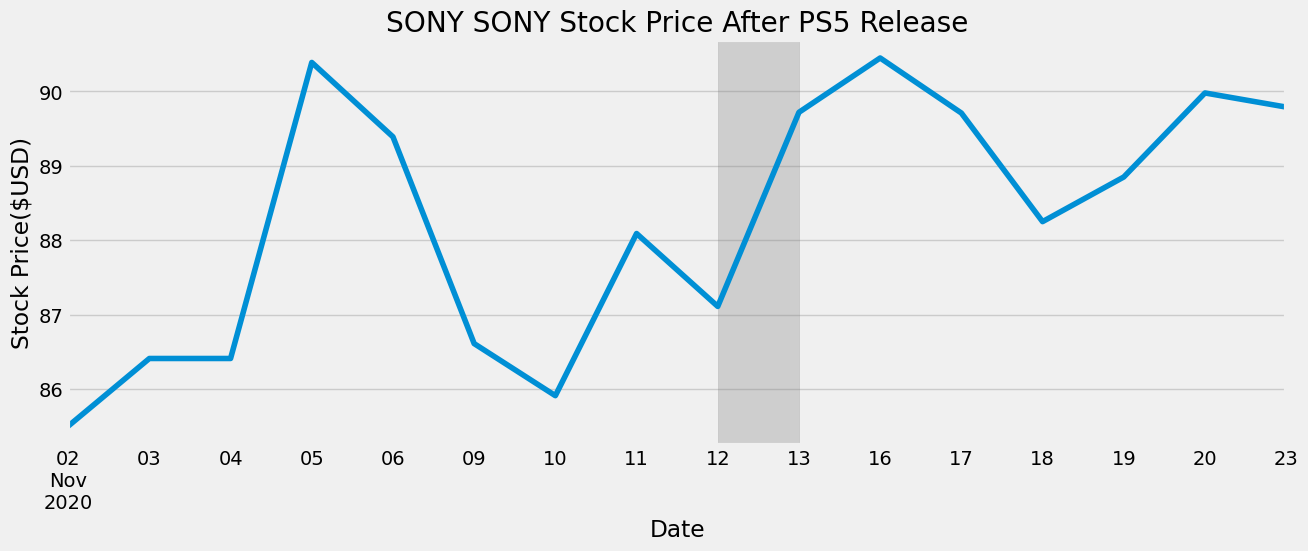

In [ ]:
import yfinance as yahooFinance
import matplotlib.pyplot as plt

def plot_sprice(ticker, start_date, end_date, shaded_start, shaded_end):

    stock_data = yahooFinance.download(ticker, start=start_date, end=end_date)

    close_prices = stock_data['Close']

    plt.figure(figsize=(14,5))
    close_prices.plot()

    # Plot shaded region for the specified date range (shade stands for Acquisition of MGM 24 hr period after announcement)
    plt.axvspan(shaded_start, shaded_end, color='gray', alpha=0.3)

    plt.title(f"{ticker} SONY Stock Price After PS5 Release")
    plt.xlabel("Date")
    plt.ylabel("Stock Price($USD)")
    plt.grid(True)
    plt.show()


ticker_symbol = 'SONY'
start_date = '2020-11-1'
end_date = '2020-11-24'
shaded_start = '2020-11-12'
shaded_end = '2020-11-13'
plot_sprice(ticker_symbol, start_date, end_date, shaded_start, shaded_end)

[*********************100%%**********************]  1 of 1 completed


<BarContainer object of 16 artists>

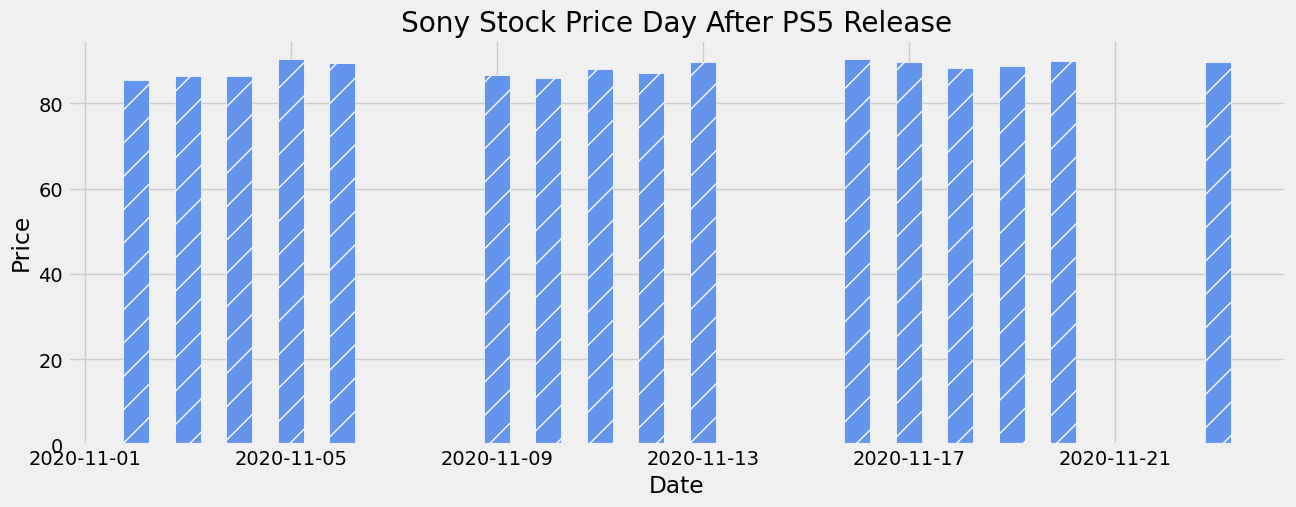

In [ ]:
plt.figure(figsize=(14,5))

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Sony Stock Price Day After PS5 Release")

startDate = datetime.datetime(2020,11,1)
endDate = datetime.datetime(2020,11,24)
sony_df = yahooFinance.download('SONY', start = startDate, end = endDate)

plt.bar(sony_df.index, sony_df['Close'], width=0.5, hatch='/', edgecolor='white', color='cornflowerblue')